In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib import pyplot as plt
#To calculate area below the normal distribution and calculate probabilities
from numpy import trapz 
from scipy.integrate import simps


Projection vectorielle
https://www.youtube.com/watch?v=uV5hmpzmWsU (on fait cet exo. a partir du temps: 46:20)

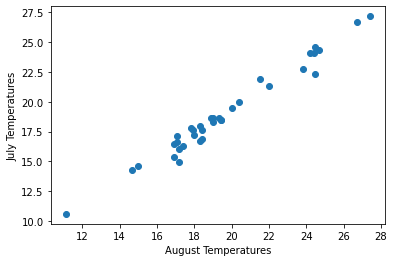

Correlation between June and July temperatures: 0.9869777062171075


In [33]:
# Step 1: (attention que des donnees quantitatives ici)
# Soit notre dataset d'origine. une representation spatiale de nos donnes signifierait: chaque axe = une variable
# l'objectif est de reduire le nombre d'axes afin je pense de pouvoir representer visuellement le dataset, de le representer de facon plus comprehensible que un dataset de nombres...
    # (essaie de trouver une explication un peu plus bulletproof qd meme lol). 

# Dans le cas present, on dispose du dataset suivant: 

df = pd.read_csv("PCA/dataTemperature.csv", index_col=0)
df.head()


# Alright, so some columns (aka variables, aka measures) in this dataset can be very similar.
# Here, we're analyzing seasonal temperatures acorss the year (the variables are months over the past 30 yrs). 
# In this very academic/basic example, it's easy to see which variable are going to be strongly correlate:
    # 2 months of the same season will have slightly or really similar temperatures..
    # 2 consecutive months will have REALLY similar temperature values.    
# To assert this statement, let's just visualize the correlation of the temperature in July and August:

JulyData = df.loc[:, 'Juillet'] 
AugustData = df.loc[:, 'Aout'] 
plt.scatter(JulyData, AugustData)
plt.ylabel('July Temperatures')
plt.xlabel('August Temperatures')
plt.show()

# On voit bien que la correlation est tres forte ici, on peut egalement calculer le coefficient de correlation pour s'en assurer:
Correlation = df["Juillet"].corr(df["Aout"])
print("Correlation between June and July temperatures: "+str(Correlation))

    

In [ ]:
# Almost equal to one aka: the perfect linear correlation...
# So maybe keeping all the months is not necessary, we might wanna remove extra data from month from the same season...
# Here's the correlation matrice to check for the correlations between all the months temperature data:
# (Check what's available in Python library to calculate that matrice, maybe in a fancy way...)

# [TO BE DONE]

# to prove that this matrix works fine, we can plot the correlation for: 
    # xxx and xxx month that have a negative correlation
    # xxx and xxx month that have a positive correlation

# [TO BE DONE]
    

# We know that we can use certain variables (certain months), to represent all the months from the same season (or month that have temperatures mathematically related: opposite temperatures for example...). 
# ATTENTION:
# L'on pourrait facilement tomber dans le piege de dire que l'ACP, c'est juste supprimer/fusionner les colonnes simillaires.
# C'est possible dans cet exemple car il s'agit d'un "dummy example". En effet, on pourrait tres clairement conserver la quasi totalite de la variabilite du dataset ET en reduire la dimension par la procedure suivante:
    # we could just keep the temperature data of one month for each season (or let's say average temperature of summer months), and take a 4 dimension axis (3 usual x,y,z dimensions + dots size as the 4th dimensions) 
    # and this would pretty accurately represent all this data in 1 visualisation tho...
    # Take a look at this:

# [TO BE DONE]

#Il tient cependant a garder en tete que cela n'est certainement pas valable de maniere generale, sur d'autres types d'examples...
    # En fait, il suffit d'ajouter un peu plus de variablite au sein meme des profils de temperature pour que les approximations sur lesquelles sont bases le schema ci dessus ne soient plus valables/possibles... (en effet dans ce contexte, 1 mois ne pourrait plus representer autant d'autres mois)
    # Ou tout simplement, avec la meme variabilite de profil chez les individus du dataset, avoir des variables dont l'interpretation est plus complexes... (ici il est facile de se rendre compte qu'on peut simplifier le jeu de donnees via la "critere saisonal", mais dans d'autres jeu de donnes, cet exercice, pourrait s'averer bien plus complex/voir impossible)
# Donc,l'ACP, c'est dire que: 
    # si l'on representait chaque individu (chaque "ville") du dataset par un point (ou un vecteur) et l'ensemble du dataset par un nuage de points (ou un nuage de vecteurs) dans un espace de dimension donne. 
    # En applatissant ce nuage (donc en le representant dans un espace de dimension plus faible), l'on conserverait tout de meme autant que possible la variabilite des donnees d'origine. 
    # Autrment dit: deux points (ou vecteurs) proches dans le nuage d'origine, devraient d'une maniere ou d'une autre le rester dans l'espace final.

# So, no matter if this example is not the best example, for the sake of simplicity we'll do the PCA on it anyways. And at the end, we'll compare our result to the simple figure plotted above to check how well we did/which method gives the most accurate result
# Ok let's keep going with PCA



In [ ]:
# Sum up: What's PCA in english? (answer: fewer number of columns for a given dataset without loosing information. Goal: plot multidemnsional data on simple visualisation)
    # So to get back to explain what we're doing here: PCA is an algorithm that will produce for our original dataset an entire new set of variables with a smaller dimension (other terminology for fewer columns)
    # Those new dimensions won't be correlated to each other. The original 12 variables probably won't be here anymore, but the new ones will hopefully carry as much information of the original data as possible
    # So that's the idea behind ACP, fewer number of variables for as much information as possible...

# Sum up: How to achieve PCA? (answer: by projecting initial dataset on vectors caryying the most variation of our dataset)
    # Above was the "English" explanation for what we're about to do. Now, here comes the math part that'll explain HOW to actually do it!:
    # We start with a number of N different "vectors" in our dataset. Each vector symbolizes a variable of the dataset (so N goes from 1 to 12 in our exemple)
    # Our vectors have all together a dimensionality D=12 (the # of column in our dataset) 
    # The goal here, is dimensional reduction. We want to map our initial space of dimensionality D=12 onto another space of dimensionality M with M<D (still following? just making stating facts here)
    # How are we going to do this mapping??
        # without getting to deep in the maths. what we'll do here, is that we'll project the vectors of our original space onto the M vectors of this new space.
        # but who are those vectors?? A good criteria for picking those vectors is the percentage of information from the original dataset these vectors can carry
        # In other words, you want to project your data onto vectors so that you can keep as much of the original variation of the data as you can
        # [TO BE DONE] (Maybe if you can, try to find a dummy example/vulgarisation so that, this rephrasing is also visual, like the example of the dromadaire in Guyader course)

# [TO BE DONE]Sum up: How to identify the vectors "with the most variation"? (answer: use the math formula)
    # We can identify mathematically who those vectors are (the ones that contains most of the original data variation). Here's the formula:
        # Maybe add these 2 videos to the resources you're alrady using that might help tho...
            # https://www.youtube.com/watch?v=QP43Iy-QQWY&feature=share&fbclid=IwAR25PnVjB61Uvu3X_q_Cb0rO131lNPmq0Bwz7yAVbTpxjUz50o6Oh0NAsOI
            # https://www.youtube.com/playlist?list=PLBv09BD7ez_4InDh85LM_43Bsw0cFDHdN&fbclid=IwAR2qI2UIyVzFb9vTj_joZAgFsDN48Urx24u2YzxeKGamZpPLMH4lL3OseuM
    # [TO BE DONE]This formula will give you the vectors we're looking for. The mathematical demonstration for this formula is out of the scope of this analysis... but I can do it just for fun...
    # [TO BE DONE]Here's theorically how to use it in our example:
        # Maybe add these 2 videos to the resources you're alrady using that might help tho...
            # https://www.youtube.com/watch?v=QP43Iy-QQWY&feature=share&fbclid=IwAR25PnVjB61Uvu3X_q_Cb0rO131lNPmq0Bwz7yAVbTpxjUz50o6Oh0NAsOI
            # https://www.youtube.com/playlist?list=PLBv09BD7ez_4InDh85LM_43Bsw0cFDHdN&fbclid=IwAR2qI2UIyVzFb9vTj_joZAgFsDN48Urx24u2YzxeKGamZpPLMH4lL3OseuM
        
    # [TO BE DONE] Thank god, Python is easier to use... we'll just use xxx
    


    
# Conclusions:
# [TO BE DONE] Conclusion 1: a first rough conclusion We can see that in the first variability dimension/axis of our new plan these 2 cities are close, meaning they have somehow temperatures profiles really similars. And still on that same variability dimension, these 2 cities are pretty far apart, so they must have somehow pretty different temperature profiles. Fact that we can check in the dataset: 
    # - [TO BE DONE]by plotting them on an axis (x=month;y=temperature)
    # - [TO BE DONE]by calculating averages, variance and other exploratory stats about them...
    # - [TO BE DONE]from above result interpretation tell on which level these cites are similar or different. In our example .... [TO BE DONE]
# [TO BE DONE] Conclusion 2: based on the previous conclusion, we can say on the second variability dimension/axis of our new plan, these 2 cities are ....
    # - [TO BE DONE] do like above...

# [TO BE DONE] Conclusion final temp:
    # - alright, all that just to say that "nice is cooler" than paris c'mon, I don't need acp for that!
    # - I know lol... but this was just a dummy example. A good dummy example, because it allows us to quickly know how accurate this methode is
    # - So of course, this is not simply about stating which cities is the coolest/hottest. this is about having a tool that'll highlight the important components of a multidimentional dataset. and our example dataset is just a way to proove our tool works fine!
    # - this tool will have a real use in situations where interpretation would be more complex,   

# Ouverture:
# [TO BE DONE] Ok, so the little conclusions drawn from above are pretty cool/funny. And they showed us that our PCA tool worked as intended: reducing the dataset original dimension while keeping most of the datavariability.Now what? 
# we were only able to interpret the reason behind the difference of 2 points on our new axis because this dataset is easy to interpret. We all know XXX is different from xxxx and how XXX2 is different from XXX2 because we went there on vacation, or we've seen it on tv, or...
# But what if it was a more complext to interpret dataset? We need to be able to map these new Axes to the old ones.








In [ ]:
# ANNEX: Here are the vids I'm using: 
# trame continue: https://www.youtube.com/watch?v=dhK8nbtii6I 
# trame continue application direct (a partir du temps: 46:20): https://www.youtube.com/watch?v=uV5hmpzmWsU
# revision vid no1 (projection vectorielle): https://www.youtube.com/watch?v=X78tLBY3BMk
# revision vid no2 (Eigen values, eigen vectors): https://www.youtube.com/watch?v=glaiP222JWA
# revision vid no3 (lagrange multipliers): https://www.youtube.com/watch?v=6oZT72-nnyI
# revision vid no4 ("Derivative of matrix" not super clear in my mind... is it liked to transposee stuff?): https://www.youtube.com/watch?v=e73033jZTCI
# revision vid no5 ("Covariance matrix"): https://www.youtube.com/watch?v=152tSYtiQbw